# First Amazon MT results annotator agreement

First Amazon HITs, done for the 1000 images, filtered to be public domain and having IIIF data, stratified sample of 250 items per `object_names` *blyant*, *maleri*, *pen* and *akvarel*.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/Racknitz_-_The_Turk_3.jpg/659px-Racknitz_-_The_Turk_3.jpg)

In [2]:
import pandas as pd
import altair as alt
import shutil
from tqdm import tqdm

In [3]:
pd.options.display.max_columns = 90

Random seed.

In [4]:
SEED = 2019

## Read data

### SMK image data

In [5]:
%%time
smk = pd.read_json('data/smk/smk_all_artworks.json').set_index('id')
smk.shape

CPU times: user 8.71 s, sys: 1.24 s, total: 9.95 s
Wall time: 10.6 s


(79004, 52)

In [10]:
smk.head()

,on_display,object_number,modified,rights,titles,production,iiif_manifest,production_date,techniques,created,object_names,has_image,public_domain,dimensions,responsible_department,inscriptions,credit_line,acquisition_date_precision,frame_notes,image_iiif_info,image_native,image_orientation,image_height,alternative_images,image_width,number_of_parts,image_iiif_id,part_of,image_thumbnail,colors,image_size,image_mime_type,image_cropped,distinguishing_features,notes,related_objects,object_history_note,collection,production_dates_notes,exhibitions,documentation,content_description,content_person,work_status,materials,parts,content_subject,acquisition_date,current_location_name,labels,image_type,current_location_date
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1180000001_object,False,KKS1979-359,2019-08-08 12:48:54+00:00,https://en.wikipedia.org/wiki/Copyright,"[{'title': 'Surreel komposition', 'language': ...","[{'creator_nationality': 'dansk', 'creator': '...",https://api.smk.dk/api/v1/iiif/manifest/?id=kk...,"[{'period': '12.oktober 1944 ', 'start': '1944...","[{'technique': 'Akvarel over blyant på tyndt, ...",2019-08-07T03:19:22Z,[{'name': 'tegning'}],False,False,"[{'part': 'bladmaal', 'type': 'hojde', 'unit':...",Samling og Forskning (KKS),[{'content': 'Sign. og dat. f.o.t.v. med pen o...,[© Ib Geertsen],1979-12-30,"[Bagklædning: false, Mikroklimaramme: false]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1180000002_object,False,KKS1979-94/80,2019-08-12 09:21:24+00:00,https://en.wikipedia.org/wiki/Copyright,"[{'type': 'ARTIST', 'title': 'Resultatet', 'la...","[{'creator': 'Nielsen, Palle', 'creator_date_o...",https://api.smk.dk/api/v1/iiif/manifest/?id=kk...,"[{'period': '(1949)', 'start': '1949-01-01T00:...",[{'technique': 'pen og sort tusch'}],2019-08-07T03:19:23Z,[{'name': 'tegning'}],True,False,"[{'part': 'bladmaal', 'type': 'hojde', 'notes'...",Samling og Forskning (KKS),"[{'content': 'Med blyant f.n.:"" 81 Resultatet""...",[© Palle Nielsen],1979-02-14,"[Bagklædning: false, Mikroklimaramme: false]",https://iip.smk.dk/iiif/jp2/pc4-28-02-05_-_122...,https://iip.smk.dk/iiif/jp2/pc4-28-02-05_-_122...,landscape,2876.0,"[{'width': 4021, 'native': 'https://iip.smk.dk...",2989.0,143.0,https://iip.smk.dk/iiif/jp2/pc4-28-02-05_-_122...,[KKS1979-94],https://iip.smk.dk/iiif/jp2/pc4-28-02-05_-_122...,"[#FFFFFF, #000000, #555555, #5A5A5A, #9B9B9B]",18640222.0,image/tiff,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1180000003_object,False,KMSr207/77,2019-08-08 08:26:46+00:00,https://creativecommons.org/share-your-work/pu...,"[{'type': 'ARTIST', 'language': 'en-US'}]","[{'creator': 'Monk, Jonathan', 'creator_histor...",https://api.smk.dk/api/v1/iiif/manifest/?id=km...,"[{'period': '1997', 'start': '1997-01-01T00:00...",[{'technique': 'Farvefotografi'}],2019-08-07T03:19:23Z,[{'name': 'installation'}],False,True,"[{'part': 'netto', 'type': 'hojde', 'notes': '...",Samling og Forskning (KMS),NaN,[© Jonathan Monk],1998-04-08,"[Bagklædning: false, Mikroklimaramme: false]",NaN,NaN,NaN,NaN,NaN,NaN,86.0,NaN,[KMSr207],NaN,NaN,NaN,NaN,NaN,[Indhold / Kollation: Installationen består af...,[For revision se delværk nummer 1],[{'notes': 'Dette eksemplar er # 1 ud af en ed...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1180000004_object,False,KKS1995-101/5,2019-08-12 09:21:24+00:00,https://en.wikipedia.org/wiki/Copyright,"[{'type': 'MUSEUM', 'title': 'Uden titel', 'la...","[{'creator': 'Kelley, Mike', 'creator_date_of_...",https://api.smk.dk/api/v1/iiif/manifest/?id=kk...,"[{'period': '1994', 'start': '1994-01-01T00:00...",[{'technique': 's/h fotografi'}],2019-08-07T03:19:23Z,[{'name': 'fotografi'}],True,False,"[{'part': 'monteringsmaal', 'type': 'hojde', '...",Samling og Forskning (KKS),"[{'content': 'Sign. og dat. f.n.m.f.: ""Mike Ke...",[© Mike Kelley],1995-12-31,"[Bagklædning: false, Mikroklimaramme:

### Results from AMT

In [6]:
results = pd.read_csv('data/amt_results/Batch_3841465_batch_results.csv')
results.shape

(3000, 33)

In [9]:
results.head()

,HITId,HITTypeId,Title,Description,Keywords,Reward,CreationTime,MaxAssignments,RequesterAnnotation,AssignmentDurationInSeconds,AutoApprovalDelayInSeconds,Expiration,NumberOfSimilarHITs,LifetimeInSeconds,AssignmentId,WorkerId,AssignmentStatus,AcceptTime,SubmitTime,AutoApprovalTime,ApprovalTime,RejectionTime,RequesterFeedback,WorkTimeInSeconds,LifetimeApprovalRate,Last30DaysApprovalRate,Last7DaysApprovalRate,Input.id,Input.image_native,Answer.image-contains,Answer.image-contains.label,Approve,Reject
0,3CVBMEMMYEYYIAXDK2O8T23L1EW7H4,3P7L6K2EZCJCZA9OFURVFP9X84M4N6,Does this image contain the object of interest?,Does this image depict a person or people?,"image, classification",$0.10,Tue Nov 19 09:26:56 PST 2019,3,BatchId:3841465;OriginalHitTemplateId:928390875;,3600,259200,Tue Nov 26 09:26:56 PST 2019,NaN,NaN,345LHZDED1AN9X048RXJNKCLW0Y3U5,A1P1XL0NKJCOLZ,Submitted,Tue Nov 19 09:28:11 PST 2019,Tue Nov 19 09:28:19 PST 2019,Fri Nov 22 09:28:19 PST 2019,NaN,NaN,NaN,8,0% (0/0),0% (0/0),0% (0/0),1180026933_object,https://iip.smk.dk/iiif/jp2/pc4-30-09-04_-_091...,NaN,Yes,NaN,NaN
1,3CVBMEMMYEYYIAXDK2O8T23L1EW7H4,3P7L6K2EZCJCZA9OFURVFP9X84M4N6,Does this image contain the object of interest?,Does this image depict a person or people?,"image, classification",$0.10,Tue Nov 19 09:26:56 PST 2019,3,BatchId:3841465;OriginalHitTemplateId:928390875;,3600,259200,Tue Nov 26 09:26:56 PST 2019,NaN,NaN,3IFS6Q0HJM1MKNQJ4P96CPWMULOISI,AAA42UYET3FVH,Submitted,Tue Nov 19 10:28:22 PST 2019,Tue Nov 19 10:42:08 PST 2019,Fri Nov 22 10:42:08 PST 2019,NaN,NaN,NaN,826,0% (0/0),0% (0/0),0% (0/0),1180026933_object,https://iip.smk.dk/iiif/jp2/pc4-30-09-04_-_091...,NaN,Yes,NaN,NaN
2,3CVBMEMMYEYYIAXDK2O8T23L1EW7H4,3P7L6K2EZCJCZA9OFURVFP9X84M4N6,Does this image contain the object of interest?,Does this image depict a person or people?,"image, classification",$0.10,Tue Nov 19 09:26:56 PST 2019,3,BatchId:3841465;OriginalHitTemplateId:928390875;,3600,259200,Tue Nov 26 09:26:56 PST 2019,NaN,NaN,3Z7VU45IP2Z8LTGZRAI8GJC30Y3Z12,A16U1L4R6WV5G2,Submitted,Tue Nov 19 09:34:10 PST 2019,Tue Nov 19 09:48:23 PST 2019,Fri Nov 22 09:48:23 PST 2019,NaN,NaN,NaN,853,0% (0/0),0% (0/0),0% (0/0),1180026933_object,https://iip.smk.dk/iiif/jp2/pc4-30-09-04_-_091...,NaN,Yes,NaN,NaN
3,3D0LPO3EBEHRPBF1BO9YQOKJHZIOY9,3P7L6K2EZCJCZA9OFURVFP9X84M4N6,Does this image contain the object of interest?,Does this image depict a person or people?,"image, classification",$0.10,Tue Nov 19 09:26:52 PST 2019,3,BatchId:3841465;OriginalHitTemplateId:928390875;,3600,259200,Tue Nov 26 09:26:52 PST 2019,NaN,NaN,35GMH2SV3IZV6QW41P2675OT533OE7,ATDX69AZL4Y49,Submitted,Tue Nov 19 09:32:48 PST 2019,Tue Nov 19 09:34:00 PST 2019,Fri Nov 22 09:34:00 PST 2019,NaN,NaN,NaN,72,0% (0/0),0% (0/0),0% (0/0),1180082433_object,https://iip.smk.dk/iiif/jp2/KKS19998-80.TIF.re...,NaN,Yes,NaN,NaN
4,3D0LPO3EBEHRPBF1BO9YQOKJHZIOY9,3P7L6K2EZCJCZA9OFURVFP9X84M4N6,Does this image contain the object of interest?,Does this image depict a person or people?,"image, classification",$0.10,Tue Nov 19 09:26:52 PST 2019,3,BatchId:3841465;OriginalHitTemplateId:928390875;,3600,259200,Tue Nov 26 09:26:52 PST 2019,NaN,NaN,3F0BG9B9MT5MRPLWK4XY3MUEXQUY72,ADJMZSRMFT3RG,Submitted,Tue Nov 19 09:27:54 PST 2019,Tue Nov 19 09:30:33 PST 2019,Fri Nov 22 09:30:33 PST 2019,NaN,NaN,NaN,159,0% (0/0),0% (0/0),0% (0/0),1180082433_object,https://iip.smk.dk/iiif/jp2/KKS19998-80.TIF.re...,NaN,Yes,NaN,NaN


### Join them

Using the object ID as key which is called `Input.id` the results dataset from AMT.

In [11]:
smk_results = smk.join(results.set_index('Input.id'), how='right')
smk_results.shape

(3000, 84)

Which columns do we now have?

In [15]:
smk_results.columns

Index(['on_display', 'object_number', 'modified', 'rights', 'titles',
       'production', 'iiif_manifest', 'production_date', 'techniques',
       'created', 'object_names', 'has_image', 'public_domain', 'dimensions',
       'responsible_department', 'inscriptions', 'credit_line',
       'acquisition_date_precision', 'frame_notes', 'image_iiif_info',
       'image_native', 'image_orientation', 'image_height',
       'alternative_images', 'image_width', 'number_of_parts', 'image_iiif_id',
       'part_of', 'image_thumbnail', 'colors', 'image_size', 'image_mime_type',
       'image_cropped', 'distinguishing_features', 'notes', 'related_objects',
       'object_history_note', 'collection', 'production_dates_notes',
       'exhibitions', 'documentation', 'content_description', 'content_person',
       'work_status', 'materials', 'parts', 'content_subject',
       'acquisition_date', 'current_location_name', 'labels', 'image_type',
       'current_location_date', 'HITId', 'HITTypeId', 'Tit

In [14]:
smk_results.head()

,on_display,object_number,modified,rights,titles,production,iiif_manifest,production_date,techniques,created,object_names,has_image,public_domain,dimensions,responsible_department,inscriptions,credit_line,acquisition_date_precision,frame_notes,image_iiif_info,image_native,image_orientation,image_height,alternative_images,image_width,number_of_parts,image_iiif_id,part_of,image_thumbnail,colors,image_size,image_mime_type,image_cropped,distinguishing_features,notes,related_objects,object_history_note,collection,production_dates_notes,exhibitions,documentation,content_description,content_person,work_status,materials,parts,content_subject,acquisition_date,current_location_name,labels,image_type,current_location_date,HITId,HITTypeId,Title,Description,Keywords,Reward,CreationTime,MaxAssignments,RequesterAnnotation,AssignmentDurationInSeconds,AutoApprovalDelayInSeconds,Expiration,NumberOfSimilarHITs,LifetimeInSeconds,AssignmentId,WorkerId,AssignmentStatus,AcceptTime,SubmitTime,AutoApprovalTime,ApprovalTime,RejectionTime,RequesterFeedback,WorkTimeInSeconds,LifetimeApprovalRate,Last30DaysApprovalRate,Last7DaysApprovalRate,Input.image_native,Answer.image-contains,Answer.image-contains.label,Approve,Reject
1180000035_object,False,KMS3682,2019-08-12 09:21:25+00:00,https://creativecommons.org/share-your-work/pu...,"[{'type': 'MUSEUM', 'title': 'En bro ved Sorre...","[{'creator_nationality': 'dansk', 'creator': '...",https://api.smk.dk/api/v1/iiif/manifest/?id=km...,"[{'period': '(1847/50)', 'start': '1847-01-01T...",[{'technique': 'Olie på papir opsat på pap'}],2019-08-07T03:19:37Z,[{'name': 'maleri'}],True,True,"[{'part': 'netto', 'type': 'hojde', 'notes': '...",Samling og Forskning (KMS),"[{'position': 'f.n.t.v.', 'content': 'T.B.'}]",NaN,1924-12-31,"[Bagklædning: false, Mikroklimaramme: false]",https://iip.smk.dk/iiif/jp2/KMS3682.tif.jp2/in...,https://iip.smk.dk/iiif/jp2/KMS3682.tif.jp2/fu...,landscape,7087.0,NaN,9447.0,1.0,https://iip.smk.dk/iiif/jp2/KMS3682.tif.jp2,NaN,https://iip.smk.dk/iiif/jp2/KMS3682.tif.jp2/fu...,"[#674200, #5A5A5A, #9B9B9B, #9B9B9B, #F4C6A3]",200881304.0,image/tiff,NaN,NaN,NaN,NaN,NaN,NaN,[Datering baseret på kunstnerens ophold i Ital...,[{'exhibition': 'I Guldalderens Skygge - Maler...,NaN,NaN,NaN,NaN,"[{'material': 'papir'}, {'material': 'pap'}, {...",NaN,[Sorrento],NaN,NaN,NaN,NaN,NaN,3XUSYT70JWJ3OJSRD7K9N2E018XD01,3P7L6K2EZCJCZA9OFURVFP9X84M4N6,Does this image contain the object of interest?,Does this image depict a person or people?,"image, classification",$0.10,Tue Nov 19 09:27:13 PST 2019,3,BatchId:3841465;OriginalHitTemplateId:928390875;,3600,259200,Tue Nov 26 09:27:13 PST 2019,NaN,NaN,345LHZDED1AN9X048RXJNKCLW023U9,A2MHSOKJSLELL,Submitted,Tue Nov 19 09:32:59 PST 2019,Tue Nov 19 09:42:37 PST 2019,Fri Nov 22 09:42:37 PST 2019,NaN,NaN,NaN,578,0% (0/0),0% (0/0),0% (0/0),https://iip.smk.dk/iiif/jp2/KMS3682.tif.jp2/fu...,NaN,No,NaN,NaN
1180000035_object,False,KMS3682,2019-08-12 09:21:25+00:00,https://creativecommons.org/share-your-work/pu...,"[{'type': 'MUSEUM', 'title': 'En bro ved Sorre...","[{'creator_nationality': 'dansk', 'creator': '...",https://api.smk.dk/api/v1/iiif/manifest/?id=km...,"[{'period': '(1847/50)', 'start': '1847-01-01T...",[{'technique': 'Olie på papir opsat på pap'}],2019-08-07T03:19:37Z,[{'name': 'maleri'}],True,True,"[{'part': 'netto', 'type': 'hojde', 'notes': '...",Samling og Forskning (KMS),"[{'position': 'f.n.t.v.', 'content': 'T.B.'}]",NaN,1924-12-31,"[Bagklædning: false, Mikroklimaramme: false]",https://iip.smk.dk/iiif/jp2/KMS3682.tif.jp2/in...,https://iip.smk.dk/iiif/jp2/KMS3682.tif.jp2/fu...,landscape,7087.0,NaN,9447.0,1.0,https://iip.smk.dk/iiif/jp2/KMS3682.tif.jp2,NaN,https://iip.smk.dk/iiif/jp2/KMS3682.tif.jp2/fu...,"[#674200, #5A5A5A, #9B9B9B, #9B9B9B, #F4C6A3]",200881304.0,image/tiff,NaN,NaN,NaN,NaN,NaN,NaN,[Datering baseret på kunstnerens ophold i Ital...,[{'exhibition': 'I Guldalderens Skygge - Maler...,NaN,NaN,NaN,NaN,"[{'material': 'papir'}, {'material': 'pap'}, {...",N

The fact is that, due to how the join was done above, the key is not unique because each artwork had 3 assignments.

In [16]:
smk_results.index.is_unique

False

So grouping the items on artwork ID is a way to go. Each has 3 items.

In [19]:
smk_results.groupby(level=0).apply(len).value_counts()

3    1000
dtype: int64

For convenience, since this was a binary task of asking whether there is person/people in a task, let's make a boolean columns for it.

In [17]:
smk_results['Answer.image-contains.people'] = smk_results['Answer.image-contains.label'].str.match('Yes')

## Results

How many images contain a person/people, how many do not? According to turkers in this task?

In [22]:
smk_results['Answer.image-contains.people'].value_counts()

True     1727
False    1272
Name: Answer.image-contains.people, dtype: int64

## Annotator agreement characterized

In [23]:
smk_results['Answer.image-contains.people'].mean()

0.5758586195398466

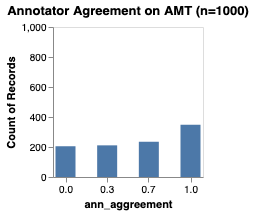

In [26]:
alt.Chart(pd.DataFrame({'ann_aggreement': smk_results.groupby(level=0)['Answer.image-contains.people'].apply(pd.np.mean)}).reset_index(),
          title=f"Annotator Agreement on AMT (n={len(smk_results.groupby(level=0))})",
          width=150,
          height=150).mark_bar(width=20).encode(
    x=alt.X('ann_aggreement', axis=alt.Axis(values=[0, .33, .66, 1])),
    y=alt.Y('count(index)', scale=alt.Scale(domain=[0, 1000]), stack=True)
).configure_axis(
    grid=False
)

The above in numbers

In [32]:
smk_results.groupby(level=0)['Answer.image-contains.people'].apply(pd.np.mean).value_counts()

1.000000    349
0.666667    235
0.333333    211
0.000000    205
Name: Answer.image-contains.people, dtype: int64

The above reads symmetrically, so that $\frac{1}{3}$ does not necessarily mean that one person disagreed with the two others, but; the statement to which the data responds to is "is there a person/people in this image", and not a gold standard truthfulness.

## Images split by level of annotator agreement

Let's make a copy of the dataset, splitting the four values to separate folders.

The directory `data/amt_results/bam-stratified-sample1000/agreement` was made.

In [33]:
for aid, data in tqdm(smk_results.groupby(level=0)):
    obj = data.head(1)['object_names'][0][0]['name']
    aa = data['Answer.image-contains.people'].mean().round(2)
    
    try:
        shutil.copy(f'data/images/bam-stratified-sample1000/{obj}/{aid}.jpg',
                    f'data/amt_results/bam-stratified-sample1000/agreement/{aa}')
    except FileExistsError:
        ...

100%|██████████| 1000/1000 [00:20<00:00, 47.87it/s]


The above image folders are available on ownCloud.